### 1.  Which stochastic optimiser did you choose (for Task 3)?

For my stochastic optimiser, I have chosen the Simulated Annealing algorithm.

### 2.  Why did you choose this optimiser?

For this task, I was choosing between using Genetic Algorithms and Simulated Annealing, and while comparing, I decided to use the latter. While SA will most likely converge slower to the optimum than GA, it is more likely to converge to the global optimum with less computational burden than GA. SA bases strongly on initial exploration, lowering the chances of staying on a local minimum.

### 3.  What constraint handling method(s) are you using and why?

To handle constraints, I have decided to use the static penalty method. In case a constraint function is violated, the value over 0 for each violated gi(x) constraint function is taken to the power of the hyperparameter beta, and then multiplied by the hyperparameter r. As there are no equalities as constraints, only the term for inequalities is used. This approach, while being simple, is also effective, as it provides slopes towards the feasible spaces while optimizing. While death penalty was thought of being used, in my opinion the feasible space is too small for most constraints to use it effectively. In the future, it might be worth to try implementing and comparing adaptive or dynamic penalty functions in case of requiring an even lower approximation of the optimum.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [2]:
global main_func_counter, g1_x_counter, g2_x_counter, g3_x_counter, g4_x_counter
main_func_counter = g1_x_counter = g2_x_counter = g3_x_counter = g4_x_counter = 0

In [3]:
def main_func(x_array):
    result = x_array[0] ** 2 * x_array[1] * (2 + x_array[2])
 
    global main_func_counter
    main_func_counter += 1

    return result

In [4]:
# The static penalty function checks whether the inequality is satisfied, that is why the zero inequality check is omitted from the gi(x) functions
def g1_x(x_array):
    result = 1 - ((x_array[1] ** 3 * x_array[2]) / (71785 * x_array[0] ** 4))

    global g1_x_counter
    g1_x_counter += 1
    
    return result

In [5]:
def g2_x(x_array):
    result = ((4 * x_array[1] ** 2 - x_array[0] * x_array[1]) / (12566 * (x_array[1] * x_array[0] ** 3 - x_array[0] ** 4)) + (1 / 5108 * x_array[0] ** 2)) - 1
 
    global g2_x_counter
    g2_x_counter += 1

    return result

In [6]:
def g3_x(x_array):
    result = 1 - ((140.45 * x_array[0]) / (x_array[1] ** 2 * x_array[2]))
 
    global g3_x_counter
    g3_x_counter += 1

    return result

In [7]:
def g4_x(x_array):
    result = ((x_array[0] + x_array[1]) / 1.5) - 1 
     
    global g4_x_counter
    g4_x_counter += 1

    return result

In [8]:
def generate_x_array():
    x_array = [np.random.uniform(0.05, 2), np.random.uniform(0.25, 1.3), np.random.uniform(2, 15)]

    return x_array

In [9]:
def static_penalty(x_array, r=5, beta=2):
    
    s1_x = r * max(0, g1_x(x_array)) ** beta
    s2_x = r * max(0, g2_x(x_array)) ** beta
    s3_x = r * max(0, g3_x(x_array)) ** beta
    s4_x = r * max(0, g4_x(x_array)) ** beta

    sum = main_func(x_array) + s1_x + s2_x + s3_x + s4_x

    return sum

In [10]:
def random_search(n):
    x_best = generate_x_array()
    y_best = static_penalty(x_best)

    for n in range(n):
        x_array = generate_x_array()
        y = static_penalty(x_array)

        if y < y_best:
            x_best = x_array
            y_best = y 

    return x_best, y_best

In [11]:
def local_transition_distribution(x_centre):
    std = [(2 - 0.05) * 0.1, 
            (1.3 - 0.25) * 0.1,
            (15 - 2) * 0.1]
    
    # Ensuring the local bounds stay within the global bounds
    local_bounds = [[max(0.05, x_centre[0] - std[0]), min(2, x_centre[0] + std[0])],
                    [max(0.25, x_centre[1] - std[1]), min(1.3, x_centre[1] + std[1])],
                    [max(2, x_centre[2] - std[2]), min(15, x_centre[2] + std[2])]]

    new_x_centre = [np.random.uniform(local_bounds[0][0], local_bounds[0][1]), 
                np.random.uniform(local_bounds[1][0], local_bounds[1][1]), 
                np.random.uniform(local_bounds[2][0], local_bounds[2][1])]

    return new_x_centre

In [12]:
def simulated_annealing(k, t_k=1000, gamma=0.25):
    x_best = generate_x_array()
    y_best = static_penalty(x_best)

    x_centre = x_best
    y_centre = y_best

    for k in range(k):
        x_new = local_transition_distribution(x_centre)
        y_new = static_penalty(x_new)

        delta_y = y_new - y_centre

        if delta_y <= 0 or np.random.uniform(0, 1) < min(np.exp(-delta_y / max(t_k, 0.001)), 1):
            x_centre = x_new
            y_centre = y_new
        
        if y_new < y_best:
            x_best = x_new
            y_best = y_new

        t_k = gamma * t_k
    
    return x_best, y_best

In [13]:
rs_results = []
sa_results = []
rs_time_sum = 0
sa_time_sum = 0

for i in range(21):
    start_rs = timer()
    rs = random_search(3000)
    end_rs = timer()
    rs_time = end_rs - start_rs
    rs_time_sum += rs_time

    rs_results.append(rs[1])

    start_sa = timer()
    sa = simulated_annealing(3000)
    end_sa = timer()
    sa_time = end_sa - start_sa
    sa_time_sum += sa_time

    sa_results.append(sa[1])

### Random Search
RS has its interquartile range quite small compared to the rest of its distribution. This suggests that while RS provides accurate enough approximations of the optimum, they are highly varied, meaning that the results can differ greatly between iterations, and especially from the median. However, as RS executes faster, this can be seen as a potential trade-off.

### Simulated Annealing
SA's distribution is quite small compared to RS, meaning that using SA will give us more consistent results than RS. The approximations of the optimum are lower than RS as well, showing a low variance and high accuracy combination. This shows that SA is overall better than RS, however it does execute slower. While not being a problem for the current amount of iterations, it would be worth thinking about when dealing with iterations going into values of millions and above.

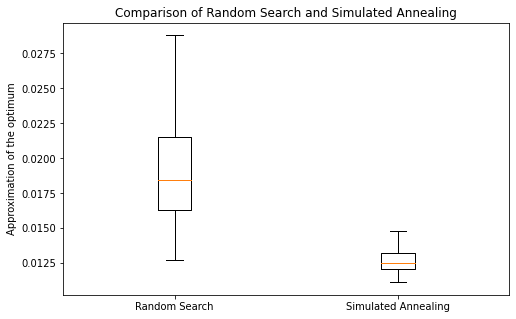

In [14]:
plt.figure(figsize=(8, 5))

plt.boxplot([rs_results, sa_results])
plt.ylabel('Approximation of the optimum')
plt.title('Comparison of Random Search and Simulated Annealing')
plt.xticks([1, 2], ['Random Search', 'Simulated Annealing'])

plt.show()

In [15]:
print(np.median(rs_results))
print(np.median(sa_results))

0.01846822389380574
0.012512853893761666


In [16]:
print(rs_time_sum)
print(sa_time_sum)

2.088367808999994
3.1771086339999997
